<a href="https://colab.research.google.com/github/4zmyyy/Belajarpyhton/blob/main/Python_Learning_Day_4_try_again_and_repeat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install TensorFlow (Percobaan model Transformer)
!pip install tensorflow

# Install Matplotlib (untuk visualisasi)
!pip install matplotlib

# Install Imagemagick untuk visualiasi
!apt-get update
!apt-get install imagemagick

# Re-check Image magick version
!convert --version

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,317 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,659 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jamm

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
!pip install --upgrade tensorflow

In [ ]:
from tensorflow.keras.layers import MultiHeadAttention
print("MultiHeadAttention is available!")

MultiHeadAttention is available!


In [ ]:
# Simulasi input data untuk model sederhana transformer
sequence_length = 10  # Panjang urutan (misalnya kalimat dengan 10 kata)
embedding_dim = 8     # Dimensi embedding (fitur per kata)

# Buat input dummy data
x = tf.random.uniform((1, sequence_length, embedding_dim))  # Batch size 1
print("Input shape:", x.shape)

Input shape: (1, 10, 8)


In [ ]:
# Simulasi input dummy data
sequence_length = 10  # Panjang urutan (misalnya kalimat dengan 10 kata)
embedding_dim = 8     # Dimensi embedding (fitur per kata)

# Buat input dummy data
x = tf.random.uniform((1, sequence_length, embedding_dim))  # Batch size 1
print("Input shape:", x.shape)

# Membuat layer MultiHeadAttention
multi_head_attention = MultiHeadAttention(num_heads=2, key_dim=embedding_dim)

# Forward pass untuk mendapatkan attention weights secara terstruktur
try:
    output, attention_weights = multi_head_attention(query=x, value=x, return_attention_scores=True)
    print("Success!")
except Exception as e:
    print("Error:", e)

# Ekstrak attention weights sederhana
attention_weights = attention_weights.numpy().squeeze()  # Shape: (num_heads, seq_len, seq_len)
print("Attention weights shape:", attention_weights.shape)

Input shape: (1, 10, 8)
Success!
Attention weights shape: (2, 10, 10)


In [ ]:
# Import library utama
import tensorflow as tf
from tensorflow.keras.layers import MultiHeadAttention
import matplotlib.pyplot as plt  # Pastikan ini ada!
import numpy as np
from matplotlib.animation import FuncAnimation

# Konfigurasi Matplotlib untuk menggunakan Imagemagick
import matplotlib
matplotlib.rcParams['animation.writer'] = 'imagemagick'

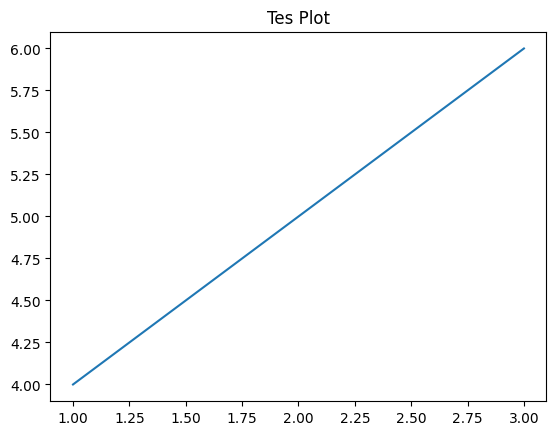

In [ ]:
# Re-Test penggunaan plt
plt.plot([1, 2, 3], [4, 5, 6])
plt.title("Tes Plot")
plt.show()

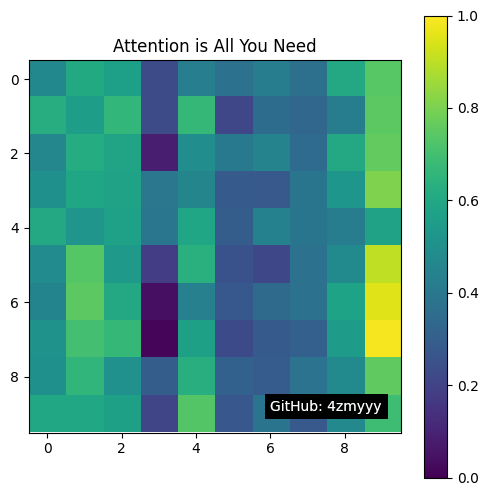

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Visualisasi animasi attention weights
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(attention_weights[0], cmap='viridis', interpolation='nearest')
ax.set_title("Attention is All You Need", fontsize=12, color='black')  # Judul tetap
cbar = fig.colorbar(im)

# Fungsi inisialisasi untuk animasi
def init():
    im.set_data(np.zeros_like(attention_weights[0]))
    return [im]

# Fungsi update untuk animasi
def update(frame):
    im.set_data(attention_weights[frame % len(attention_weights)])  # Loop melalui setiap head

    # Ganti judul menjadi "Attention is All You Need"
    ax.set_title("Attention is All You Need", fontsize=12, color='black')

    # Tambahkan teks nama akun GitHub di pojok kanan bawah
    ax.text(0.95, 0.05, "GitHub: 4zmyyy", fontsize=10, color='white',
            ha='right', va='bottom', transform=ax.transAxes,
            bbox=dict(facecolor='black', alpha=0.5, edgecolor='none'))

    return [im]

# Buat animasi
ani = FuncAnimation(fig, update, frames=len(attention_weights) * 3, init_func=init, blit=True, interval=1000)

# Simpan animasi sebagai GIF
ani.save('transformer_attention.gif', writer='imagemagick', fps=1)

# Tampilkan animasi di notebook
plt.show()

# Download file GIF jika perlu
from google.colab import files
files.download('transformer_attention.gif')

In [ ]:
# Install ffmpeg
!apt-get install ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [ ]:
# Re-Check versi ffmpeg yang sesuai
!ffmpeg -version

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-l

In [ ]:
# Buat animasi
ani = FuncAnimation(fig, update, frames=len(attention_weights) * 3, init_func=init, blit=True, interval=1000)

# Simpan animasi sebagai video MP4
ani.save('transformer_attention.mp4', writer='ffmpeg', fps=1)

# Tampilkan video di notebook
from IPython.display import HTML
HTML("""
<video width="600" controls>
  <source src="transformer_attention.mp4" type="video/mp4">
</video>
""")


In [ ]:
from google.colab import files
files.download('transformer_attention.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print("Nilai attention_weights:")
print(attention_weights)
print("Min:", np.min(attention_weights))
print("Max:", np.max(attention_weights))

Nilai attention_weights:
[[[0.09961708 0.10228734 0.09538539 0.10692652 0.10089505 0.09969258
   0.09763838 0.09909516 0.1005157  0.09794678]
  [0.09608082 0.10564973 0.09711985 0.1012473  0.09660118 0.10098406
   0.09691732 0.10217991 0.10168869 0.1015312 ]
  [0.09787328 0.10295233 0.09709651 0.10324103 0.09774479 0.10035385
   0.10026299 0.10014977 0.10155346 0.0987719 ]
  [0.09765251 0.10364831 0.09576765 0.10434455 0.1022764  0.10159976
   0.09359388 0.0969369  0.10385844 0.1003215 ]
  [0.09820942 0.10302395 0.09731131 0.10269143 0.10037573 0.10034097
   0.09649124 0.09913512 0.10170647 0.10071425]
  [0.09558419 0.10460889 0.09922272 0.09832785 0.09734586 0.10203782
   0.09747594 0.09847209 0.1052191  0.10170549]
  [0.09848349 0.10380394 0.09524936 0.10642353 0.09861881 0.10003492
   0.09885823 0.09986853 0.10125413 0.09740497]
  [0.09521666 0.10630748 0.09606648 0.10256819 0.096641   0.10171103
   0.09718556 0.09990951 0.10414176 0.10025227]
  [0.0971319  0.10313478 0.09939175 0.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

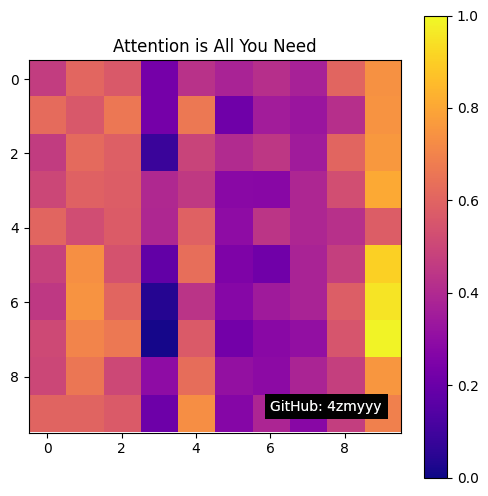

In [ ]:
# Visualisasi animasi attention weights
fig, ax = plt.subplots(figsize=(6, 6))

# Normalisasi attention_weights ke rentang [0, 1] (opsional)
attention_weights = (attention_weights - np.min(attention_weights)) / (np.max(attention_weights) - np.min(attention_weights))

# Tampilkan heatmap awal
im = ax.imshow(attention_weights[0], cmap='plasma', interpolation='nearest', vmin=0, vmax=1)
ax.set_title("Attention is All You Need", fontsize=12, color='black')  # Judul tetap
cbar = fig.colorbar(im)

# Fungsi inisialisasi untuk animasi
def init():
    im.set_data(np.zeros_like(attention_weights[0]))
    return [im]

# Fungsi update untuk animasi
def update(frame):
    im.set_data(attention_weights[frame % len(attention_weights)])  # Loop melalui setiap head

    # Ganti judul menjadi "Attention is All You Need"
    ax.set_title("Attention is All You Need", fontsize=12, color='black')

    # Tambahkan teks nama akun GitHub di pojok kanan bawah
    ax.text(0.95, 0.05, "GitHub: 4zmyyy", fontsize=10, color='white',
            ha='right', va='bottom', transform=ax.transAxes,
            bbox=dict(facecolor='black', alpha=0.5, edgecolor='none'))

    return [im]

# Buat animasi
ani = FuncAnimation(fig, update, frames=len(attention_weights) * 3, init_func=init, blit=True, interval=1000)

# Simpan animasi sebagai video MP4
ani.save('transformer_attention.mp4', writer='ffmpeg', fps=1)

# Tampilkan video di notebook
from IPython.display import HTML
HTML("""
<video width="600" controls>
  <source src="transformer_attention.mp4" type="video/mp4">
</video>
""")

# Download file MP4 jika perlu
from google.colab import files
files.download('transformer_attention.mp4')